In [22]:
!pip install wand

import random

from typing import List, Tuple
from wand.image import Image as WImage

Defaulting to user installation because normal site-packages is not writeable


# Лабораторная работа 1. Методы сортировки

Вариант: 7

## Гномья сортировка (gnome sort)


### Классификация алгоритма:

- По типу алгоритма: обменная сортировка

- По устойчивости: устойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 
  
  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n^2)$

### Описание алгоритма:

Гномья сортировка (англ. Gnome sort) — алгоритм сортировки, похожий на сортировку вставками, но в отличие от последней перед вставкой на нужное место происходит серия обменов, как в сортировке пузырьком. Название происходит от предполагаемого поведения садовых гномов при сортировке линии садовых горшков. 

Гном идет по массиву до того момента, как не встретит пару рядом стоящих эл-ов (i и i-1) в неправильном пор-ке. Гном меняет их местами, при этом учитывает, что перестановка данной пары может породить пару неправильно стоящих эл-ов сзади, он передвигается назад на один эл-т и проверяет правильность. Если он встречает неправильно стоящие эл-ты, то меняет их местами и бежит снова назад до тех пор, пока не встретит первую пару правильно стоящих эл-ов. Встреченная пара правильно стоящих эл-ов означает, что массив до данных эл-ов отсортирован, что позволяет двигаться вперед.

### Блок-схема алгоритма

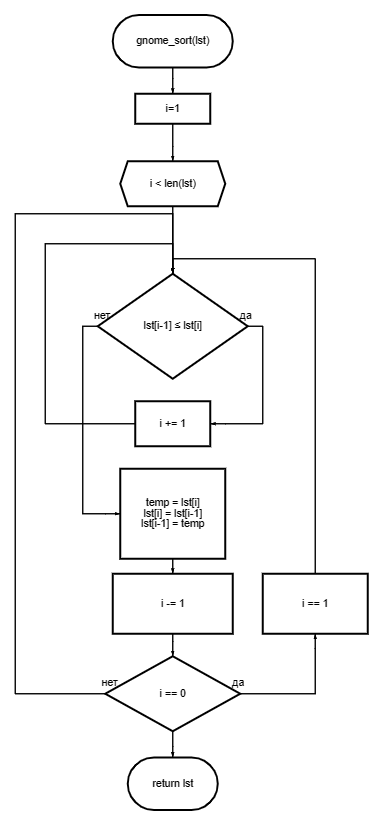

In [24]:
img = WImage(filename='./img/block_scheme.png')
img

### Псевдокод алгоритма

```
i = 1
WHILE i < n
    IF x[i-1] <= x[i] THEN
        NEXT i
    ELSE
        temp = x[i]
        x[i] = x[i-1]
        x[i-1] = temp
        PREV i
        IF i == 0 THEN
            i == 1     
```


### Реализация алгоритма

Достоинства алгоритма:
    
    -- простота реализации
    
Недостатки:

    -- низкая эффективность

###  Ручная трассировка
```   
начальный массив : [4] [2] [7] [3], гномья сортировка по возрастанию

    [4] [2] [7] [3] (начальное состояние: i == 1, i-1 == 0);
    [2] [4] [7] [3] (4 < 2 == false, меняем местами 4 и 2, при i -= 1, i обращается в нуль, поэтому i = 1);
    [2] [4] [7] [3] (i == 1, 2 <= 4 == true, идем далее, i += 1);
    [2] [4] [7] [3] (i == 2, 4 <= 7 == true, идем далее, i += 1);
    [2] [4] [7] [3] (i == 3, 7 <= 3 == false, меняем местами 7 и 3, i -= 1);
    [2] [4] [3] [7] (i == 2, 4 <= 3 == false, меняем местами 4 и 3, i -= 1);
    [2] [3] [4] [7] (i == 1, 2 <= 3 == true, идем далее, i += 1);
    [2] [3] [4] [7] (i == 2, 3 <= 4 == true, идем далее, i += 1);
    [2] [3] [4] [7] (i == 3, 4 <= 7 == true, идем далее, i += 1);
    цикл закончился, т. к. i не < 4.
```

In [2]:
###  HELPING

def swap(lst : List, i : int, j : int):
    tmp = lst[i]
    lst[i] = lst[j]
    lst[j] = tmp

def print_swap(lst : List, i : int, j : int):
    swap(lst, i, j)
    
    '''Иллюстрация обмена элементов'''
    s = [f' {str(a):<3}'  for a in lst]
    s[i] = f'<{s[i].strip()}>'
    s[j] = f'<{s[j].strip()}>'
    s = ' '.join(s)
    I = s.find('<')
    J = s.rfind('>') - I - 3
    swap_str = ' ' + ' '*I + '^' + '-'*J + '^'
    print(s)
    print(swap_str, end='\n\n\n')
    
def my_print_swap(lst : List, i : int, j : int):
    result=""
    under_result = ''
    if j < i:
        temp = i
        i = j
        j = temp
    k = 0
    while k < i:
        result += str(lst[k]) + '  '
        under_result += (len(str(lst[k])) + 2) * ' '
        k += 1
    result += '|' + str(lst[i]) + '|   '
    under_result += '\\' + len(str(lst[i])) * '_' + '/<'
    k = i + 1
    while k < j:
        result += str(lst[k]) + '  '
        under_result += '--' + (len(str(lst[k]))) * '-'
        k += 1
    result += '|' + str(lst[j]) + '|  '
    under_result += '->\\' + len(str(lst[j])) * '_' + '/  '
    k = j + 1
    while k < len(lst):
        result += str(lst[k]) + '  '
        k += 1
    result += '\n' + under_result + '\n'
    print(result)
    swap(lst, i, j)

### Алгоиртм

In [3]:
def gnome_sort(lst : List)->List:
    size = len(lst)
    i = 1
    while i < size:
        if (lst[i - 1] <= lst[i]):
            i += 1
        else:
            swap(lst, i, i-1)
            i-= 1
            if (i == 0):
                i = 1
    return lst

def gnome_sort_with_print(lst : List)->List:
    size = len(lst)
    i = 1
    while i < size:
        if (lst[i - 1] <= lst[i]):
            i += 1
        else:
            my_print_swap(lst, i, i - 1)
            i-= 1
            if (i == 0):
                i = 1
    return lst

### Тестирование

In [4]:
### Тестирование программы

assert gnome_sort([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert gnome_sort([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert gnome_sort([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert gnome_sort([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [5]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->List:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->List:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->List:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))

### Большие массивы по 1000, 5000, 10000, 30000 эл-ов

In [6]:
n1 = 1000
x1_sort = list(get_sort_array(n1))
x1_reverse = list(get_reverse_array(n1))
x1_random = list(get_random_array(n1))

n2 = 5000
x2_sort = list(get_sort_array(n2))
x2_reverse = list(get_reverse_array(n2))
x2_random = list(get_random_array(n2))

n3 = 10000
x3_sort = list(get_sort_array(n3))
x3_reverse = list(get_reverse_array(n3))
x3_random = list(get_random_array(n3))

n4 = 30000
x4_sort = list(get_sort_array(n4))
x4_reverse = list(get_reverse_array(n4))
x4_random = list(get_random_array(n4))

In [7]:
%%time

gnome_sort(x1_sort);
a = 0;

CPU times: user 50 µs, sys: 12 µs, total: 62 µs
Wall time: 63.2 µs


In [8]:
%%time

gnome_sort(x1_reverse);
a = 0;

CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 118 ms


In [9]:
%%time

gnome_sort(x1_random);
a = 0;

CPU times: user 57.7 ms, sys: 0 ns, total: 57.7 ms
Wall time: 65.1 ms


In [10]:
%%time

gnome_sort(x2_sort);
a = 0;

CPU times: user 294 µs, sys: 0 ns, total: 294 µs
Wall time: 296 µs


In [11]:
%%time

gnome_sort(x2_reverse);
a = 0;

CPU times: user 2.79 s, sys: 15.3 ms, total: 2.8 s
Wall time: 3.05 s


In [12]:
%%time

gnome_sort(x2_random);
a = 0;

CPU times: user 1.4 s, sys: 4 ms, total: 1.41 s
Wall time: 1.48 s


In [13]:
%%time

gnome_sort(x3_sort);
a = 0;

CPU times: user 622 µs, sys: 14 µs, total: 636 µs
Wall time: 659 µs


In [14]:
%%time

gnome_sort(x3_reverse);
a = 0;

CPU times: user 11 s, sys: 7.99 ms, total: 11.1 s
Wall time: 11.1 s


In [15]:
%%time

gnome_sort(x3_random);
a = 0;

CPU times: user 5.62 s, sys: 23.8 ms, total: 5.65 s
Wall time: 6.15 s


In [16]:
%%time

gnome_sort(x4_sort);
a = 0;

CPU times: user 1.91 ms, sys: 0 ns, total: 1.91 ms
Wall time: 1.91 ms


In [17]:
%%time

gnome_sort(x4_reverse);
a = 0;

CPU times: user 1min 39s, sys: 16.2 ms, total: 1min 39s
Wall time: 1min 39s


In [18]:
%%time

gnome_sort(x4_random);
a = 0;

CPU times: user 48.4 s, sys: 3.94 ms, total: 48.4 s
Wall time: 48.4 s


### Диаграмма

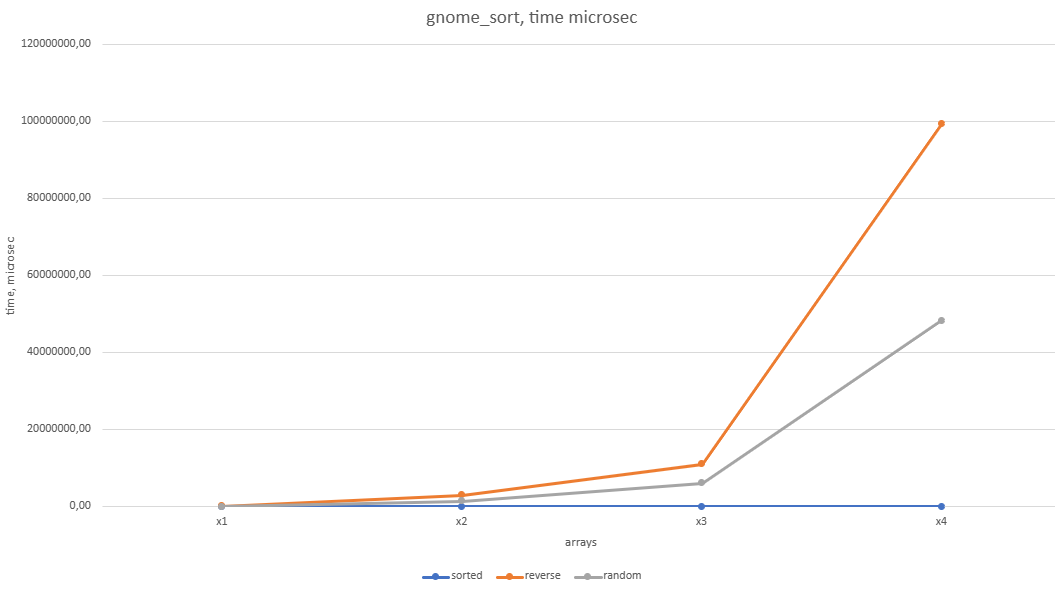

In [23]:
img = WImage(filename='./img/diagramm.png')
img

### Иллюстрация работы алгоритма

In [19]:
A = [52424, 82424, 1224, 7222, 6]
A = gnome_sort_with_print(A)
print(A)

52424  |82424|   |1224|  7222  6  
       \_____/<->\____/  

|52424|   |1224|  82424  7222  6  
\_____/<->\____/  

1224  52424  |82424|   |7222|  6  
             \_____/<->\____/  

1224  |52424|   |7222|  82424  6  
      \_____/<->\____/  

1224  7222  52424  |82424|   |6|  
                   \_____/<->\_/  

1224  7222  |52424|   |6|  82424  
            \_____/<->\_/  

1224  |7222|   |6|  52424  82424  
      \____/<->\_/  

|1224|   |6|  7222  52424  82424  
\____/<->\_/  

[6, 1224, 7222, 52424, 82424]
